# Proyecto Final

Importamos las librerias a usar

In [249]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression, LogisticRegression, BayesianRidge, LassoLars, ElasticNet, MultiTaskLasso, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from feature_engine.encoding import RareLabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, auc, roc_curve, roc_auc_score
import seaborn as sns
import datetime

Carga de csv

In [250]:
hospitalizados = pd.read_csv('covid.csv')

In [251]:
hospitalizados.head()

,Asthma Diagnose ID,Asthma Diagnose,Obesity Diagnose ID,Obesity Diagnose,Diabetes Diagnose ID,Diabetes Diagnose,Cardiovascular Diagnose ID,Cardiovascular Diagnose,Hypertension Diagnose ID,Hypertension Diagnose,...,Chronic Kidney Failure Diagnose,Diagnosis of Another Disease ID,Diagnosis of Another Disease,State Patient Attended ID,State Patient Attended,Sex ID,Sex,Required ICU ID,Required ICU,Cases
0,1,Si,1,Si,1,Si,1,Si,1,Si,...,Si,1,Si,5,Coahuila de Zaragoza,1,Hombre,97,No Aplica,1
1,1,Si,1,Si,1,Si,1,Si,1,Si,...,Si,1,Si,5,Coahuila de Zaragoza,1,Hombre,97,No Aplica,1
2,1,Si,1,Si,1,Si,1,Si,1,Si,...,Si,1,Si,26,Sonora,2,Mujer,97,No Aplica,1
3,1,Si,1,Si,1,Si,1,Si,1,Si,...,No,1,Si,26,Sonora,2,Mujer,97,No Aplica,1
4,1,Si,1,Si,1,Si,1,Si,1,Si,...,Si,2,No,15,Estado de México,1,Hombre,97,No Aplica,1


#### EDA (Exploratory Data Analysis)

Revisamos cuantos nulos tenemos en nuestro dataset

In [252]:
hospitalizados.isnull().sum()

Asthma Diagnose ID                    0
Asthma Diagnose                       0
Obesity Diagnose ID                   0
Obesity Diagnose                      0
Diabetes Diagnose ID                  0
Diabetes Diagnose                     0
Cardiovascular Diagnose ID            0
Cardiovascular Diagnose               0
Hypertension Diagnose ID              0
Hypertension Diagnose                 0
Inmunosupresion Diagnose ID           0
Inmunosupresion Diagnose              0
Health Institution Attended ID        0
Health Institution Attended           0
Covid Result ID                       0
Covid Result                          0
Intubated Patient ID                  0
Intubated Patient                     0
Is Dead ID                            0
Is Dead                               0
Pneumonia Diagnose ID                 0
Pneumonia Diagnose                    0
Smoking Diagnose ID                   0
Smoking Diagnose                      0
Chronic Kidney Failure Diagnose ID    0


Revisamos la correlación entre variables

Asthma Diagnose ID                   -0.013634
Obesity Diagnose ID                  -0.019627
Diabetes Diagnose ID                 -0.025873
Cardiovascular Diagnose ID           -0.015366
Hypertension Diagnose ID             -0.022740
Inmunosupresion Diagnose ID          -0.019932
Health Institution Attended ID       -0.054827
Covid Result ID                      -0.191246
Intubated Patient ID                 -0.344520
Is Dead ID                            1.000000
Pneumonia Diagnose ID                -0.065730
Smoking Diagnose ID                  -0.015288
Chronic Kidney Failure Diagnose ID   -0.017753
Diagnosis of Another Disease ID      -0.030138
State Patient Attended ID             0.012947
Sex ID                               -0.051882
Required ICU ID                      -0.343556
Cases                                -0.009951
Name: Is Dead ID, dtype: float64

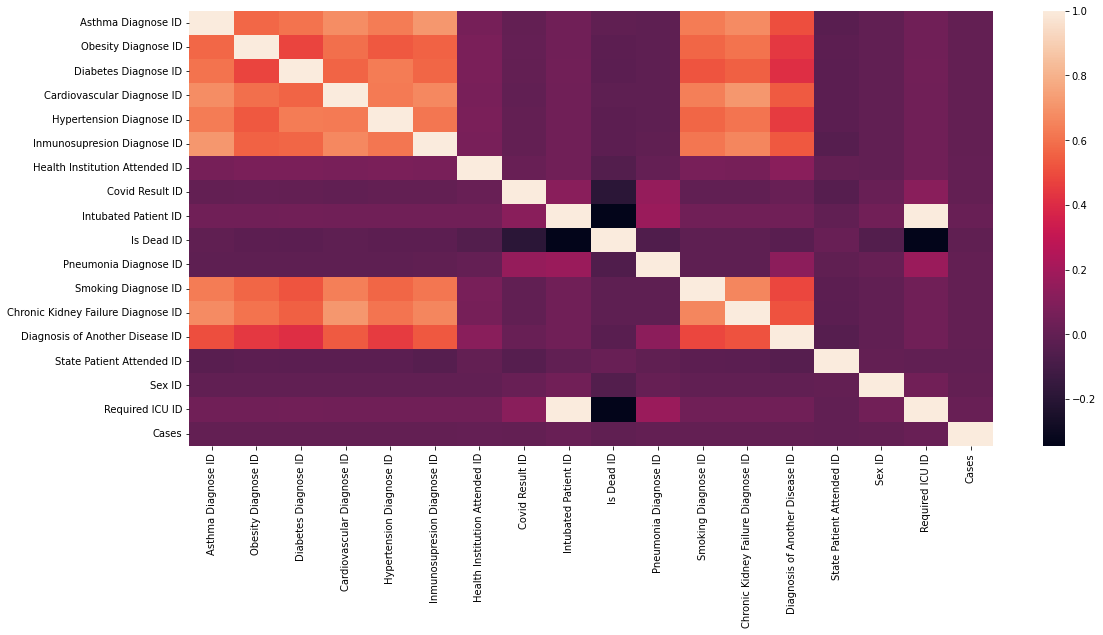

In [253]:
plt.figure(figsize=(18,8))
sns.heatmap(hospitalizados.corr() )
hospitalizados.corr()['Is Dead ID']

Vemos que hay 2 variables que estan correlacionadas y que no podrían caer en colinealidad (Intubated Patient ID, Requires ICU ID), por lo que se dejan todas para nuestro modelo

Por lo que vemos no tenemos nulos pero sabemos que hay datos que limpiar, ya que tenemos valores representados con numeros extremadamente grandes

In [254]:
hospitalizados.describe()

,Asthma Diagnose ID,Obesity Diagnose ID,Diabetes Diagnose ID,Cardiovascular Diagnose ID,Hypertension Diagnose ID,Inmunosupresion Diagnose ID,Health Institution Attended ID,Covid Result ID,Intubated Patient ID,Is Dead ID,Pneumonia Diagnose ID,Smoking Diagnose ID,Chronic Kidney Failure Diagnose ID,Diagnosis of Another Disease ID,State Patient Attended ID,Sex ID,Required ICU ID,Cases
count,237480.000000,237480.000000,237480.000000,237480.000000,237480.000000,237480.000000,237480.000000,237480.000000,237480.000000,237480.000000,237480.000000,237480.000000,237480.000000,237480.000000,237480.000000,237480.000000,237480.000000,2.374800e+05
mean,3.832765,3.372238,3.905634,3.925063,3.596484,4.041372,7.647979,1.665079,40.539136,0.301310,3.649103,3.963850,3.848383,5.698846,16.215222,1.478204,40.579716,6.503999e+01
std,13.587970,12.774943,14.811559,14.143387,14.062601,14.283079,3.860023,0.694182,46.832090,0.458828,14.115872,14.337737,13.853940,18.900021,8.722201,0.499526,46.817474,3.910424e+03
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00
25%,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,4.000000,1.000000,2.000000,0.000000,1.000000,2.000000,2.000000,2.000000,9.000000,1.000000,2.000000,1.000000e+00
50%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,6.000000,2.000000,2.000000,0.000000,2.000000,2.000000,2.000000,2.000000,15.000000,1.000000,2.000000,1.000000e+00
75%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,12.000000,2.000000,97.000000,1.000000,2.000000,2.000000,2.000000,2.000000,24.000000,2.000000,97.000000,4.000000e+00
max,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,99.000000,3.000000,99.000000,1.000000,99.000000,98.000000,98.000000,98.000000,32.000000,2.000000,99.000000,1.287151e+06


Como podemos ver, los valores que tienen ID, son valores que se pueden eliminar

valores:\
    97 = "No Aplica"\
    98 = "Se Ignora"\
    99 = "No Especificado"

Estandarizamos los valores a que sean cercanos a 0

In [255]:
for col in [ x for x in hospitalizados.columns if x.find("ID") != -1]:
    print('-'*100)
    print(col)
    print(f'unique ID   = {hospitalizados[col].unique()}')

    hospitalizados.loc[hospitalizados[col] == 98, col] = 0
    hospitalizados.loc[hospitalizados[col] == 97, col] = 2
    hospitalizados.loc[hospitalizados[col] == 99, col] = 0
    print(f'unique ID   = {hospitalizados[col].unique()}')
    print(f'unique Desc = {hospitalizados[col[:-3]].unique()}')


----------------------------------------------------------------------------------------------------
Asthma Diagnose ID
unique ID   = [ 1  2 98]
unique ID   = [1 2 0]
unique Desc = ['Si' 'No' 'Se Ignora']
----------------------------------------------------------------------------------------------------
Obesity Diagnose ID
unique ID   = [ 1  2 98]
unique ID   = [1 2 0]
unique Desc = ['Si' 'No' 'Se Ignora']
----------------------------------------------------------------------------------------------------
Diabetes Diagnose ID
unique ID   = [ 1  2 98]
unique ID   = [1 2 0]
unique Desc = ['Si' 'No' 'Se Ignora']
----------------------------------------------------------------------------------------------------
Cardiovascular Diagnose ID
unique ID   = [ 1  2 98]
unique ID   = [1 2 0]
unique Desc = ['Si' 'No' 'Se Ignora']
----------------------------------------------------------------------------------------------------
Hypertension Diagnose ID
unique ID   = [ 1  2 98]
unique ID   = [1 2

eliminamos los espacios en todas las columnas

In [256]:
hospitalizados.columns = [col.replace(' ','_') for col in hospitalizados.columns ]

In [257]:
def data_columnas(df, columns):

    df_limpio = df.drop(columns = [col for col in df if col not in columns])
    df_limpio = df_limpio.drop_duplicates()
    df_nuevo = df[df['Is_Dead_ID']==1].groupby(columns, as_index=False).Cases.sum()
    df_limp_muer = df_limpio.merge(df_nuevo, how='left', on = columns)
    df_limpio['muertos'] = np.where(df_limp_muer['Cases'].isnull(),0,df_limp_muer.Cases)
    df_nuevo = df[df['Is_Dead_ID']==0].groupby(columns, as_index=False).Cases.sum()
    df_limp_vivos = df_limpio.merge(df_nuevo, how='left', on = columns)
    df_limpio['vivos'] = np.where(df_limp_vivos ['Cases'].isnull(),0,df_limp_vivos.Cases)
    df_limpio['per'] = df_limpio.muertos/(df_limpio.muertos + df_limpio.vivos)
    return df_limpio.reset_index(drop=True)


Empezamos a ver la relación entre cada una de las variables vs la probabilidad que las personas hayan muerto

In [258]:
data_columnas(hospitalizados, ['Pneumonia_Diagnose','Pneumonia_Diagnose_ID']).sort_values('per', ascending=False)

,Pneumonia_Diagnose_ID,Pneumonia_Diagnose,muertos,vivos,per
2,1,Si,282022,470172,0.374933
0,2,No,131101,14406807,0.009018
1,0,No Especificado,869,154726,0.005585


In [259]:
data_columnas(hospitalizados, ['Health_Institution_Attended']).sort_values('per', ascending=False)

,Health_Institution_Attended,muertos,vivos,per
7,SEDENA,6457.0,36677,0.149696
4,ISSSTE,31220.0,322048,0.088375
10,Universitario,540.0,6844,0.073131
5,PEMEX,4803.0,62141,0.071747
8,SEMAR,1632.0,21143,0.071658
3,IMSS-Bienestar,3410.0,70492,0.046142
2,IMSS,225545.0,5058518,0.042684
1,Estatal,5847.0,148142,0.037970
11,Municipal,186.0,10717,0.017060
9,SSA,125280.0,8603853,0.014352


vemos que Diagonosticados con Neumonía son importantes, ya que hay una dispartidad en los valores de personas vivas vs muertas

In [260]:
columnas_imp = [col for col in hospitalizados.columns if col.find('ID') == -1 and col != 'Is_Dead_ID']

for col in columnas_imp:
    if col != 'Cases':
        print('-'*100)
        print(col)
        print(data_columnas(hospitalizados, [col, col+'_ID']).sort_values('per', ascending=False))


----------------------------------------------------------------------------------------------------
Asthma_Diagnose
   Asthma_Diagnose_ID Asthma_Diagnose  muertos     vivos       per
2                   0       Se Ignora     2239     64110  0.033746
1                   2              No   404635  14659184  0.026861
0                   1              Si     7118    308411  0.022559
----------------------------------------------------------------------------------------------------
Obesity_Diagnose
   Obesity_Diagnose_ID Obesity_Diagnose  muertos     vivos       per
0                    1               Si    80746   1289171  0.058942
2                    0        Se Ignora     2021     63063  0.031052
1                    2               No   331225  13679471  0.023641
----------------------------------------------------------------------------------------------------
Diabetes_Diagnose
   Diabetes_Diagnose_ID Diabetes_Diagnose  muertos     vivos       per
0                     1        

lo que se puede ver, es que todas las variables son importantes para el modelo, siendo que hay una diferencia significativa entre todos los valores, como por ejemplo: el porcentaje de muertos es mayor por más de .1 al porcentaje de vivos\
el único valor que no es muy significativo es el estado en donde pasa, por lo que ese valor no entrará en el modelo

Cambiamos los valores para emular a un rar enconder siendo que no tenemos la frecuencia para poderlo hacer

In [261]:
hospitalizados.loc[~hospitalizados['Health_Institution_Attended'].isin(['SEDENA', 'ISSSTE', 'Universitario', 'PEMEX', 'SEMAR']),'Health_Institution_Attended'] = 'Otro'

In [262]:
hospitalizados['Health_Institution_Attended'].unique()

array(['Otro', 'ISSSTE', 'PEMEX', 'SEDENA', 'SEMAR', 'Universitario'],
      dtype=object)

por lo que se observo al revisar si que tanto porcentaje de muerte hay entre cada una de las variables, vimos que el estado no hace una gran diferencia por lo que podemos removerlo de nuestro modelo

In [263]:
columnas_imp = [col for col in hospitalizados.columns if col.find('ID') == -1 and col != 'State Patient Attended']
columnas_imp

['Asthma_Diagnose',
 'Obesity_Diagnose',
 'Diabetes_Diagnose',
 'Cardiovascular_Diagnose',
 'Hypertension_Diagnose',
 'Inmunosupresion_Diagnose',
 'Health_Institution_Attended',
 'Covid_Result',
 'Intubated_Patient',
 'Is_Dead',
 'Pneumonia_Diagnose',
 'Smoking_Diagnose',
 'Chronic_Kidney_Failure_Diagnose',
 'Diagnosis_of_Another_Disease',
 'State_Patient_Attended',
 'Sex',
 'Required_ICU',
 'Cases']

Encodeamos los valores de Health institution Attended, ya que se ve que son relevantes

In [264]:
encoder = OneHotEncoder(sparse=False)
health_encoder = encoder.fit_transform(pd.DataFrame(hospitalizados['Health_Institution_Attended']))
health_encoder = pd.DataFrame(health_encoder)
health_encoder.columns = encoder.get_feature_names_out()
health_encoder
#encoder.get_feature_names_out()


,Health_Institution_Attended_ISSSTE,Health_Institution_Attended_Otro,Health_Institution_Attended_PEMEX,Health_Institution_Attended_SEDENA,Health_Institution_Attended_SEMAR,Health_Institution_Attended_Universitario
0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
237475,0.0,0.0,0.0,0.0,0.0,1.0
237476,0.0,0.0,0.0,0.0,0.0,1.0
237477,0.0,0.0,0.0,0.0,0.0,1.0
237478,0.0,0.0,0.0,0.0,0.0,1.0


eliminamos los valores categóricos en hospitalizados

In [265]:
hospitalizados_ord = hospitalizados.select_dtypes(exclude=['object'])
hospitalizados_ord

,Asthma_Diagnose_ID,Obesity_Diagnose_ID,Diabetes_Diagnose_ID,Cardiovascular_Diagnose_ID,Hypertension_Diagnose_ID,Inmunosupresion_Diagnose_ID,Health_Institution_Attended_ID,Covid_Result_ID,Intubated_Patient_ID,Is_Dead_ID,Pneumonia_Diagnose_ID,Smoking_Diagnose_ID,Chronic_Kidney_Failure_Diagnose_ID,Diagnosis_of_Another_Disease_ID,State_Patient_Attended_ID,Sex_ID,Required_ICU_ID,Cases
0,1,1,1,1,1,1,1,1,2,0,2,1,1,1,5,1,2,1
1,1,1,1,1,1,1,1,2,2,0,2,1,1,1,5,1,2,1
2,1,1,1,1,1,1,3,1,2,0,2,1,1,1,26,2,2,1
3,1,1,1,1,1,1,3,1,2,0,2,1,2,1,26,2,2,1
4,1,1,1,1,1,1,3,1,2,0,2,2,1,2,15,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237475,0,0,0,0,0,0,13,2,2,0,2,0,0,0,14,2,2,1
237476,0,0,0,0,0,0,13,3,2,0,1,0,0,0,19,1,2,2
237477,0,0,0,0,0,0,13,3,2,0,1,0,0,0,19,2,2,1
237478,0,0,0,0,0,0,13,3,2,0,2,0,0,0,14,1,2,1


concatenamos el resultado de nuestro health_encoder con nuestro dataset

In [266]:
hospitalizados_concat = pd.concat([hospitalizados_ord,health_encoder], axis=1)

In [267]:
hospitalizados_concat.columns

Index(['Asthma_Diagnose_ID', 'Obesity_Diagnose_ID', 'Diabetes_Diagnose_ID',
       'Cardiovascular_Diagnose_ID', 'Hypertension_Diagnose_ID',
       'Inmunosupresion_Diagnose_ID', 'Health_Institution_Attended_ID',
       'Covid_Result_ID', 'Intubated_Patient_ID', 'Is_Dead_ID',
       'Pneumonia_Diagnose_ID', 'Smoking_Diagnose_ID',
       'Chronic_Kidney_Failure_Diagnose_ID', 'Diagnosis_of_Another_Disease_ID',
       'State_Patient_Attended_ID', 'Sex_ID', 'Required_ICU_ID', 'Cases',
       'Health_Institution_Attended_ISSSTE',
       'Health_Institution_Attended_Otro', 'Health_Institution_Attended_PEMEX',
       'Health_Institution_Attended_SEDENA',
       'Health_Institution_Attended_SEMAR',
       'Health_Institution_Attended_Universitario'],
      dtype='object')

In [268]:
hospitalizados_concat

,Asthma_Diagnose_ID,Obesity_Diagnose_ID,Diabetes_Diagnose_ID,Cardiovascular_Diagnose_ID,Hypertension_Diagnose_ID,Inmunosupresion_Diagnose_ID,Health_Institution_Attended_ID,Covid_Result_ID,Intubated_Patient_ID,Is_Dead_ID,...,State_Patient_Attended_ID,Sex_ID,Required_ICU_ID,Cases,Health_Institution_Attended_ISSSTE,Health_Institution_Attended_Otro,Health_Institution_Attended_PEMEX,Health_Institution_Attended_SEDENA,Health_Institution_Attended_SEMAR,Health_Institution_Attended_Universitario
0,1,1,1,1,1,1,1,1,2,0,...,5,1,2,1,0.0,1.0,0.0,0.0,0.0,0.0
1,1,1,1,1,1,1,1,2,2,0,...,5,1,2,1,0.0,1.0,0.0,0.0,0.0,0.0
2,1,1,1,1,1,1,3,1,2,0,...,26,2,2,1,0.0,1.0,0.0,0.0,0.0,0.0
3,1,1,1,1,1,1,3,1,2,0,...,26,2,2,1,0.0,1.0,0.0,0.0,0.0,0.0
4,1,1,1,1,1,1,3,1,2,0,...,15,1,2,1,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237475,0,0,0,0,0,0,13,2,2,0,...,14,2,2,1,0.0,0.0,0.0,0.0,0.0,1.0
237476,0,0,0,0,0,0,13,3,2,0,...,19,1,2,2,0.0,0.0,0.0,0.0,0.0,1.0
237477,0,0,0,0,0,0,13,3,2,0,...,19,2,2,1,0.0,0.0,0.0,0.0,0.0,1.0
237478,0,0,0,0,0,0,13,3,2,0,...,14,1,2,1,0.0,0.0,0.0,0.0,0.0,1.0


In [269]:
df = data_columnas(hospitalizados_concat, ['Asthma_Diagnose_ID', 'Obesity_Diagnose_ID', 'Diabetes_Diagnose_ID',
       'Cardiovascular_Diagnose_ID', 'Hypertension_Diagnose_ID',
       'Inmunosupresion_Diagnose_ID',
       'Covid_Result_ID', 'Intubated_Patient_ID',
       'Pneumonia_Diagnose_ID', 'Smoking_Diagnose_ID',
       'Chronic_Kidney_Failure_Diagnose_ID', 'Diagnosis_of_Another_Disease_ID',
       'State_Patient_Attended_ID', 'Sex_ID', 'Required_ICU_ID',
       'Health_Institution_Attended_ISSSTE',
       'Health_Institution_Attended_Otro', 'Health_Institution_Attended_PEMEX',
       'Health_Institution_Attended_SEDENA',
       'Health_Institution_Attended_SEMAR',
       'Health_Institution_Attended_Universitario'])
df.sort_values(by='per', ascending=False)

,Asthma_Diagnose_ID,Obesity_Diagnose_ID,Diabetes_Diagnose_ID,Cardiovascular_Diagnose_ID,Hypertension_Diagnose_ID,Inmunosupresion_Diagnose_ID,Covid_Result_ID,Intubated_Patient_ID,Pneumonia_Diagnose_ID,Smoking_Diagnose_ID,...,Required_ICU_ID,Health_Institution_Attended_ISSSTE,Health_Institution_Attended_Otro,Health_Institution_Attended_PEMEX,Health_Institution_Attended_SEDENA,Health_Institution_Attended_SEMAR,Health_Institution_Attended_Universitario,muertos,vivos,per
92569,2,2,2,2,1,2,1,1,1,1,...,2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
29809,2,1,1,2,2,2,1,1,2,2,...,2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
29775,2,1,1,2,2,2,1,1,2,2,...,2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
29774,2,1,1,2,2,2,1,1,2,2,...,2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
29773,2,1,1,2,2,2,1,1,2,2,...,2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44944,2,1,2,2,2,2,3,2,0,2,...,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0
44943,2,1,2,2,2,2,3,2,0,1,...,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,34.0,0.0
44942,2,1,2,2,2,2,3,2,0,1,...,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
44941,2,1,2,2,2,2,3,2,0,1,...,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0


Revisamos valores únicos

In [270]:
df.per.unique()

array([0.        , 1.        , 0.4       , ..., 0.0019084 , 0.88059701,
       0.13846154])

emepzamos con nuestro train test split

In [271]:
df = df.drop(columns=['vivos','muertos'])

In [272]:
X = df.drop(columns=['per'])
y = df['per']

In [273]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=42)

comenzamos con una regresion lineal de arbol

In [274]:
tree_para = {'criterion':['squared_error', 'friedman_mse', 'poisson'],'splitter':['random'], 'max_depth':[20,30], 'max_features':['auto','sqrt','log2'], 'random_state':[42] }
grid_search_cv = GridSearchCV(DecisionTreeRegressor(), tree_para)
grid_search_cv.fit(X_train,y_train)
print('pass grid fit')
print(grid_search_cv.best_params_)
print(f'grid score = {grid_search_cv.score(X_train,y_train)}')
#regtree = DecisionTreeRegressor(
#                                 criterion= grid_search_cv.best_params_['criterion'] 
#                                ,max_depth= grid_search_cv.best_params_['max_depth'] 
#                                ,max_features = grid_search_cv.best_params_['max_features']
#                                ,random_state = 42
#                                ,splitter= grid_search_cv.best_params_['splitter']
#                            )
#regtree = DecisionTreeRegressor(criterion='poisson', splitter= 'random' , max_depth=50, random_state=42)
#regtree.fit(X_train,y_train)
#print(f'regtree train score = {regtree.score(X_train,y_train)}')
#print(f'regtree test score = {regtree.score(X_test,y_test)}')

pass grid fit
{'criterion': 'poisson', 'max_depth': 20, 'max_features': 'auto', 'random_state': 42, 'splitter': 'random'}
grid score = 0.514817161258879


In [275]:
regtree = DecisionTreeRegressor(
                                 criterion= 'poisson'
                                ,max_depth= 20
                                ,max_features = 'auto'
                                ,random_state = 42
                                ,splitter= 'random'
                            )
regtree.fit(X_train,y_train)
print(f'regtree train score = {regtree.score(X_train,y_train)}')
print(f'regtree test score = {regtree.score(X_test,y_test)}')

regtree train score = 0.514817161258879
regtree test score = 0.4030435151098096


Se comentó el grid de randomeForest pporque se tarda demasiado pero el resultado esta expresado en la función a continuación

In [276]:
#tree_para = {'criterion':['squared_error', 'poisson'], 'max_depth':[20,30], 'max_features':['auto','sqrt','log2'], 'random_state':[42] }
#grid_search_cv = GridSearchCV(RandomForestRegressor(), tree_para)
#grid_search_cv.fit(X_train,y_train)
#print('pass grid fit')
#print(grid_search_cv.best_params_)
#print(f'grid score = {grid_search_cv.score(X_train,y_train)}')

usar onehotencoder
get_dummies
    onehotenconder pra machine learning

Probar onehotencoder, y despues probar con get_dummies

RandomSearch
ParameterGrid
SearchGrid

In [277]:
def modelos(X_train, y_train, X_test, y_test):
    modelos = [DecisionTreeRegressor( criterion = 'poisson',splitter='random', max_depth=20, random_state=42),RandomForestRegressor(random_state=42, max_depth=30, criterion='poisson', max_features='sqrt'), LinearRegression(), BayesianRidge()]
    for model in modelos:
        print('-'*100)
        print(model)
        model.fit(X_train,y_train)
        print(f' training = {model.score(X_train,y_train)} \n')
        print(f' test = {model.score(X_test,y_test)} \n')

modelos(X_train, y_train, X_test, y_test)



----------------------------------------------------------------------------------------------------
DecisionTreeRegressor(criterion='poisson', max_depth=20, random_state=42,
                      splitter='random')
 training = 0.514817161258879 

 test = 0.4030435151098096 

----------------------------------------------------------------------------------------------------
RandomForestRegressor(criterion='poisson', max_depth=30, max_features='sqrt',
                      random_state=42)
 training = 0.6293516338155567 

 test = 0.4693167239124828 

----------------------------------------------------------------------------------------------------
LinearRegression()
 training = 0.32976061010029645 

 test = 0.335420576550141 

----------------------------------------------------------------------------------------------------
BayesianRidge()
 training = 0.32976048129971625 

 test = 0.33541411116642006 



por lo que vemos es que el Random Forest Regressor fue el de mejor test teniendo un 0.47, ahora usaremos la técnica de OneHotEncoder para todas las variables que teníamos

In [278]:
hospitalizados.columns = [col.replace(' ','_') for col in hospitalizados.columns ]
hospitalizados_cat = hospitalizados.select_dtypes('object').drop(columns=['State_Patient_Attended'])

In [279]:
hospitalizados_cat = hospitalizados_cat.replace('No Aplica','No')

In [280]:
hospitalizados_cat['Required_ICU'].unique()

array(['No', 'No Especificado', 'Si'], dtype=object)

In [281]:
encoder = OneHotEncoder(sparse=False)
X_encoded = pd.DataFrame(encoder.fit_transform(hospitalizados_cat))
X_encoded.columns = encoder.get_feature_names_out()
X_encoded

,Asthma_Diagnose_No,Asthma_Diagnose_Se Ignora,Asthma_Diagnose_Si,Obesity_Diagnose_No,Obesity_Diagnose_Se Ignora,Obesity_Diagnose_Si,Diabetes_Diagnose_No,Diabetes_Diagnose_Se Ignora,Diabetes_Diagnose_Si,Cardiovascular_Diagnose_No,...,Chronic_Kidney_Failure_Diagnose_Se Ignora,Chronic_Kidney_Failure_Diagnose_Si,Diagnosis_of_Another_Disease_No,Diagnosis_of_Another_Disease_Se Ignora,Diagnosis_of_Another_Disease_Si,Sex_Hombre,Sex_Mujer,Required_ICU_No,Required_ICU_No Especificado,Required_ICU_Si
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237475,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
237476,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
237477,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
237478,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [282]:
X_encoded_concat = pd.concat([X_encoded,hospitalizados.Cases,hospitalizados['Is_Dead_ID']], axis=1)
X_encoded_concat

,Asthma_Diagnose_No,Asthma_Diagnose_Se Ignora,Asthma_Diagnose_Si,Obesity_Diagnose_No,Obesity_Diagnose_Se Ignora,Obesity_Diagnose_Si,Diabetes_Diagnose_No,Diabetes_Diagnose_Se Ignora,Diabetes_Diagnose_Si,Cardiovascular_Diagnose_No,...,Diagnosis_of_Another_Disease_No,Diagnosis_of_Another_Disease_Se Ignora,Diagnosis_of_Another_Disease_Si,Sex_Hombre,Sex_Mujer,Required_ICU_No,Required_ICU_No Especificado,Required_ICU_Si,Cases,Is_Dead_ID
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1,0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1,0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1,0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1,0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237475,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1,0
237476,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,2,0
237477,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1,0
237478,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1,0


In [283]:
def data_columnas_d(df, columns):

    df_limpio = df.drop(columns = [col for col in df if col not in columns])
    df_limpio = df_limpio.drop_duplicates()
    df_nuevo = df[df['Is_Dead_ID']==1].groupby(columns, as_index=False).Cases.sum()
    df_limp_muer = df_limpio.merge(df_nuevo, how='left', on = columns)
    df_limpio['muertos'] = np.where(df_limp_muer['Cases'].isnull(),0,df_limp_muer.Cases)
    df_nuevo = df[df['Is_Dead_ID']==0].groupby(columns, as_index=False).Cases.sum()
    df_limp_vivos = df_limpio.merge(df_nuevo, how='left', on = columns)
    df_limpio['vivos'] = np.where(df_limp_vivos ['Cases'].isnull(),0,df_limp_vivos.Cases)
    df_limpio['per'] = df_limpio.muertos/(df_limpio.muertos + df_limpio.vivos)
    return df_limpio.reset_index(drop=True)

In [284]:
X_encoded_concat

,Asthma_Diagnose_No,Asthma_Diagnose_Se Ignora,Asthma_Diagnose_Si,Obesity_Diagnose_No,Obesity_Diagnose_Se Ignora,Obesity_Diagnose_Si,Diabetes_Diagnose_No,Diabetes_Diagnose_Se Ignora,Diabetes_Diagnose_Si,Cardiovascular_Diagnose_No,...,Diagnosis_of_Another_Disease_No,Diagnosis_of_Another_Disease_Se Ignora,Diagnosis_of_Another_Disease_Si,Sex_Hombre,Sex_Mujer,Required_ICU_No,Required_ICU_No Especificado,Required_ICU_Si,Cases,Is_Dead_ID
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1,0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1,0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1,0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1,0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237475,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1,0
237476,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,2,0
237477,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1,0
237478,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1,0


In [285]:
X_encoded_cat = data_columnas(X_encoded_concat,['Asthma_Diagnose_No', 'Asthma_Diagnose_Se Ignora', 'Asthma_Diagnose_Si',
       'Obesity_Diagnose_No', 'Obesity_Diagnose_Se Ignora',
       'Obesity_Diagnose_Si', 'Diabetes_Diagnose_No',
       'Diabetes_Diagnose_Se Ignora', 'Diabetes_Diagnose_Si',
       'Cardiovascular_Diagnose_No', 'Cardiovascular_Diagnose_Se Ignora',
       'Cardiovascular_Diagnose_Si', 'Hypertension_Diagnose_No',
       'Hypertension_Diagnose_Se Ignora', 'Hypertension_Diagnose_Si',
       'Inmunosupresion_Diagnose_No', 'Inmunosupresion_Diagnose_Se Ignora',
       'Inmunosupresion_Diagnose_Si', 'Health_Institution_Attended_ISSSTE',
       'Health_Institution_Attended_Otro', 'Health_Institution_Attended_PEMEX',
       'Health_Institution_Attended_SEDENA',
       'Health_Institution_Attended_SEMAR',
       'Health_Institution_Attended_Universitario',
       'Covid_Result_No positivo SARS-CoV-2',
       'Covid_Result_Positivo SARS-CoV-2', 'Covid_Result_Resultado pendiente',
       'Intubated_Patient_No', 'Intubated_Patient_No Especificado',
       'Intubated_Patient_Si',
       'Pneumonia_Diagnose_No', 'Pneumonia_Diagnose_No Especificado',
       'Pneumonia_Diagnose_Si', 'Smoking_Diagnose_No',
       'Smoking_Diagnose_Se Ignora', 'Smoking_Diagnose_Si',
       'Chronic_Kidney_Failure_Diagnose_No',
       'Chronic_Kidney_Failure_Diagnose_Se Ignora',
       'Chronic_Kidney_Failure_Diagnose_Si', 'Diagnosis_of_Another_Disease_No',
       'Diagnosis_of_Another_Disease_Se Ignora',
       'Diagnosis_of_Another_Disease_Si', 'Sex_Hombre', 'Sex_Mujer',
       'Required_ICU_No', 'Required_ICU_No Especificado', 'Required_ICU_Si'])

In [286]:
X_encoded_cat.drop(columns=['muertos', 'vivos'], inplace = True)

Empezamos a probar modelos para los datos Encodeados

In [287]:
X = X_encoded_cat.drop(columns=['per'])
y = X_encoded_cat['per']
X_train_enc, X_test_enc, y_train_enc, y_test_enc = train_test_split(X,y, test_size=.2, random_state=42)

In [288]:
tree_para = {'criterion':['squared_error', 'friedman_mse', 'poisson'],'splitter':['random'], 'max_depth':[20,30], 'max_features':['auto','sqrt','log2'], 'random_state':[42] }
grid_search_cv = GridSearchCV(DecisionTreeRegressor(), tree_para)
grid_search_cv.fit(X_train_enc,y_train_enc)
print('pass grid fit')
print(grid_search_cv.best_params_)
print(f'grid score = {grid_search_cv.score(X_train_enc,y_train_enc)}')
print(f'grid score = {grid_search_cv.score(X_test_enc,y_test_enc)}')

pass grid fit
{'criterion': 'poisson', 'max_depth': 20, 'max_features': 'auto', 'random_state': 42, 'splitter': 'random'}
grid score = 0.621259776361057
grid score = 0.2753438013939884


In [289]:
regtree = DecisionTreeRegressor(
                                 criterion= 'poisson'
                                ,max_depth= 20
                                ,max_features = 'auto'
                                ,random_state = 42
                                ,splitter= 'random'
                            )
regtree.fit(X_train_enc,y_train_enc)
print(f'regtree train score = {regtree.score(X_train_enc,y_train_enc)}')
print(f'regtree test score = {regtree.score(X_test_enc,y_test_enc)}')

regtree train score = 0.621259776361057
regtree test score = 0.2753438013939884


Se comento Grid search para el random forest por el tiepo que toma, pero el valor optimo se encuentra en la función a continuación.

In [290]:
#tree_para = {'criterion':['squared_error', 'poisson'], 'max_depth':[20,30], 'max_features':['auto','sqrt','log2'], 'random_state':[42] }
#grid_search_cv = GridSearchCV(RandomForestRegressor(), tree_para)
#grid_search_cv.fit(X_train_enc,y_train_enc)
#print('pass grid fit')
#print(grid_search_cv.best_params_)
#print(f'train score = {grid_search_cv.score(X_train_enc,y_train_enc)}')
#print(f'test score = {grid_search_cv.score(X_test_enc,y_test_enc)}')

In [291]:
def modelos(X_train, y_train, X_test, y_test):
    scores = []
    modelos = [DecisionTreeRegressor( criterion = 'poisson',splitter='random', max_depth=20, random_state=42, max_features='auto'),RandomForestRegressor(random_state=42, max_depth=30, criterion='poisson', max_features='log2'), LinearRegression(), BayesianRidge()]
    for model in modelos:
        print('-'*100)
        print(model)
        model.fit(X_train,y_train)
        print(f' training = {model.score(X_train,y_train)}')
        print(f' test = {model.score(X_test,y_test)}')
        scores.append([model, model.score(X_test, y_test)])
        print(scores)
    return max(scores, key=lambda x: x[1])

best_model = modelos(X_train_enc, y_train_enc, X_test_enc, y_test_enc)
print(best_model[1])

y_pred = best_model[0].predict(X_test_enc)
X_compare = pd.concat([X_test_enc.reset_index(),y_test_enc.reset_index(),pd.DataFrame(y_pred)], axis=1)
X_compare.to_csv('Result of prediction.csv')

----------------------------------------------------------------------------------------------------
DecisionTreeRegressor(criterion='poisson', max_depth=20, max_features='auto',
                      random_state=42, splitter='random')
 training = 0.621259776361057
 test = 0.2753438013939884
[[DecisionTreeRegressor(criterion='poisson', max_depth=20, max_features='auto',
                      random_state=42, splitter='random'), 0.2753438013939884]]
----------------------------------------------------------------------------------------------------
RandomForestRegressor(criterion='poisson', max_depth=30, max_features='log2',
                      random_state=42)
 training = 0.6930975768252345
 test = 0.44674708453657597
[[DecisionTreeRegressor(criterion='poisson', max_depth=20, max_features='auto',
                      random_state=42, splitter='random'), 0.2753438013939884], [RandomForestRegressor(criterion='poisson', max_depth=30, max_features='log2',
                      random_s

Sacamos el promedio del error absoluto y el error cuadrado promedio

In [292]:
print(mean_absolute_error(y_test_enc,y_pred))
print(mean_squared_error(y_test_enc,y_pred))

0.20814767888053395
0.08957131747136347


Revisamos la curva Roc para saber que tanto porcentaje nos estaríamos acercando a un resultado verídico

0.886947956048557

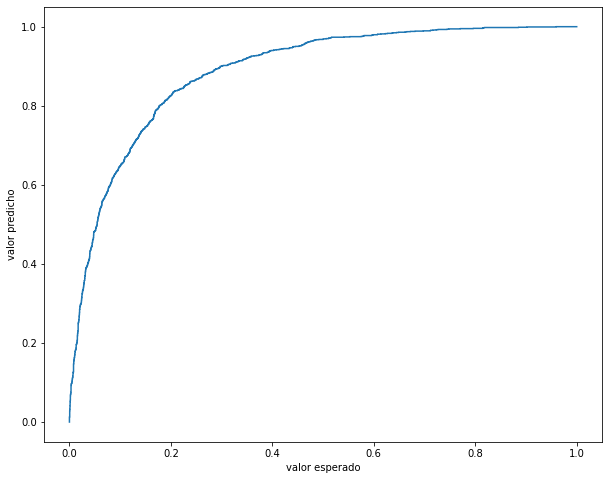

In [293]:
fpr, tpr, thresholds = roc_curve(round(y_test_enc), y_pred)
plt.figure(figsize=(10,8))
plt.plot(fpr, tpr)
plt.ylabel('valor predicho')
plt.xlabel('valor esperado')

roc_auc_score(round(y_test_enc),y_pred )
#roc = 

sí el valor de roc score es 1 categorizaría todo correctamente, entonces mientras sea más cercano a 1, es mejor la regresión para nuestro modelo

In [294]:
X_test_enc.reset_index()

,index,Asthma_Diagnose_No,Asthma_Diagnose_Se Ignora,Asthma_Diagnose_Si,Obesity_Diagnose_No,Obesity_Diagnose_Se Ignora,Obesity_Diagnose_Si,Diabetes_Diagnose_No,Diabetes_Diagnose_Se Ignora,Diabetes_Diagnose_Si,...,Chronic_Kidney_Failure_Diagnose_Se Ignora,Chronic_Kidney_Failure_Diagnose_Si,Diagnosis_of_Another_Disease_No,Diagnosis_of_Another_Disease_Se Ignora,Diagnosis_of_Another_Disease_Si,Sex_Hombre,Sex_Mujer,Required_ICU_No,Required_ICU_No Especificado,Required_ICU_Si
0,3142,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1,19545,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,13954,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,25465,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,1588,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5265,22833,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5266,1365,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5267,19926,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
5268,575,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [295]:
y_test_enc.reset_index().drop(columns=['index'])

,per
0,0.000000
1,1.000000
2,0.105473
3,0.250000
4,0.000000
...,...
5265,1.000000
5266,0.272727
5267,0.000000
5268,0.000000


Sólo para confirmar, hacemos un scatter con la diagonal que debería de seguir y se nota que la mayoria de los puntos estan cerca de la recta y en caso que se categorizará se podría hacer de una manera correcta

Text(0.5, 0, 'valor esperado')

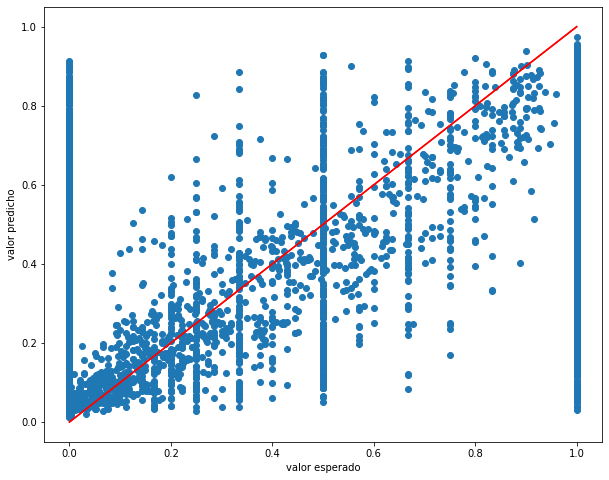

In [296]:
y_test_plot = y_test_enc.reset_index().drop(columns=['index'])

plt.figure(figsize=(10,8))
plt.scatter(y_test_plot,y_pred)
plt.plot(((0,0),(1,1)), color="red")
plt.ylabel('valor predicho')
plt.xlabel('valor esperado')